In [2]:
from fnet.utils import figures
import os
import glob
from IPython.core.display import display
import PIL.Image
from natsort import natsorted
import numpy as np
import shutil

from tifffile import imread, imsave

from scipy import misc

import pdb

import pandas as pd


def normalize_im(img, im_min, im_max):
    img -= np.min(im_min)
    img /= np.max(im_max-im_min)
    
#     pdb.set_trace()
    
    img[img<0] = 0
    img[img>1] = 1
    
    img *= 255
    
    return img

In [3]:
results_dir = '/root/projects/pytorch_fnet/results/'
save_dir = results_dir + '/paper/figures'



if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
um_per_px = 0.29

desired_scale_bar_len_um = 10

scale_bar_shape = [3,int(np.round(desired_scale_bar_len_um/um_per_px))]

scale_bar_pos = [5, 5]

scale_bar_info = {'um_per_px': um_per_px, 'scale_bar_len (px)': scale_bar_shape[1], 'scale_bar_len (um)': desired_scale_bar_len_um}

df = pd.DataFrame.from_dict([scale_bar_info])

df.to_csv(save_dir + os.sep + 'scale_bar_info.csv', index = False)

print(df)
    

   scale_bar_len (px)  scale_bar_len (um)  um_per_px
0                  34                  10       0.29


### Figure 1a, 1b ###

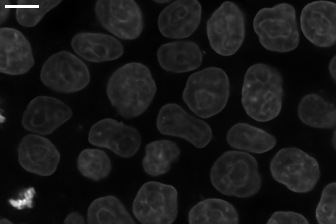

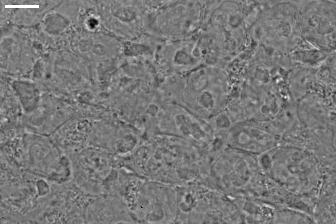

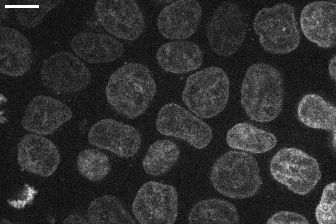

In [4]:
im_dir = '/root/allen/aics/modeling/cheko/projects/pytorch_fnet/results/3d/dna/test/02'

z_slice = 33

figure_dir = save_dir + os.sep + 'fig_1ab'
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

im_paths = glob.glob(im_dir + os.sep + '*')


for im_path in im_paths:
    #copy the original image to the figure directory
    shutil.copy(im_path, figure_dir)
    
    file_root, file_name = os.path.split(im_path)
    
    #read the image and save out a 2D slice
    img = imread(im_path)
    
    img_2d = img[:,z_slice,:,:]
    
    imsave(figure_dir + os.sep + file_name[0:-5] + '_2d.tiff', img_2d)
    
#     pdb.set_trace()
    
    max_inten = np.max(img_2d)
    img_2d[:, scale_bar_pos[0]:(scale_bar_pos[0]+scale_bar_shape[0]), scale_bar_pos[1]:(scale_bar_pos[1]+scale_bar_shape[1])] = max_inten
    imsave(figure_dir + os.sep + file_name[0:-5] + '_2d_scale_bar.tiff', img_2d)
    
    img_2d_tmp = img_2d.astype(np.float)
    
    img_2d_tmp = img_2d_tmp-np.min(img_2d_tmp)
    img_2d_tmp = img_2d_tmp/np.max(img_2d_tmp)
    img_2d_tmp *= 255
    
    display(PIL.Image.fromarray(np.squeeze(img_2d_tmp.astype(np.uint8))))


### Fig 1b v2 ###

z slice: 32
y slice: 112


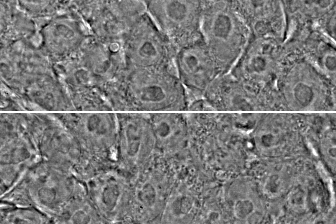

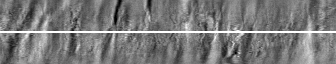

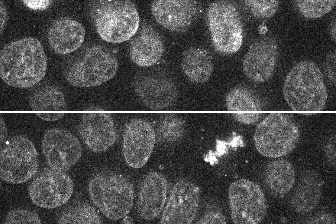

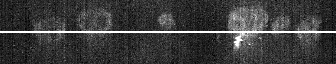

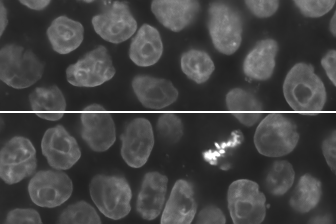

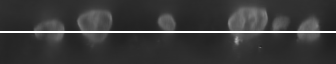

In [6]:
figure_dir = save_dir + os.sep + 'fig_1b_v2'
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

def get_slices(img, z_slice, y_slice):
    
    im_slice_xy = img[:,z_slice,:,:]
    im_slice_zx = img[:,:, y_slice,:]
    
    img_xy = np.squeeze(im_slice_xy.astype(np.uint8))    
    img_xz = np.squeeze(im_slice_zx.astype(np.uint8))
    
    return img_xy, img_xz


im_dir = '/root/allen/aics/modeling/cheko/projects/pytorch_fnet/results/3d/dna/test/04'


im_paths = glob.glob(im_dir + os.sep + '*')

im_paths = np.array(im_paths)[[1,2,0]]
im_names = [os.path.split(path)[1].split('.')[0] for path in im_paths]


img = list()
for im_path in im_paths:
    #copy the original image to the figure directory
    shutil.copy(im_path, figure_dir)
    
    file_root, file_name = os.path.split(im_path)
    
    #read the image and save out a 2D slice
    img += [imread(im_path)]


min_bf, max_bf = np.percentile(img[0], [0.1, 99.9])

min_fluor, max_fluor = np.percentile(img[1:2], [0.1, 99.9])

img[0] = normalize_im(img[0], min_bf, max_bf)

img[1] = normalize_im(img[1], min_fluor, max_fluor)
img[2] = normalize_im(img[2], min_fluor, max_fluor)

      
z_slice = int(img[0].shape[1]/2)
y_slice = int(img[0].shape[2]/2)

print('z slice: {0}'.format(z_slice))
print('y slice: {0}'.format(y_slice))
    
# window_position = [20, 140]
# window_size = [100, 100]
# border_thickness = 2

    
# display(PIL.Image.fromarray(np.squeeze(img_2d_tmp.astype(np.uint8))))


for channel, name, i in zip(img, im_names, range(len(img))):
    img_xy, img_xz = get_slices(channel, z_slice, y_slice)
          
    save_path = figure_dir + os.sep + name + '_xy.tif'
    imsave(save_path, img_xy)
        
    if i == 0:
        img_xy_scale_bar = np.copy(img_xy)
        img_xy_scale_bar[scale_bar_pos[0]:(scale_bar_pos[0]+scale_bar_shape[0]), scale_bar_pos[1]:(scale_bar_pos[1]+scale_bar_shape[1])] = 255
        save_path = figure_dir + os.sep + name + '_xy_scale_bar.tif'
        imsave(save_path, img_xy_scale_bar)
    
    save_path = figure_dir + os.sep + name + '_xy.tif'
    imsave(save_path, img_xy)
    
    img_xy[(y_slice-1):(y_slice+1),:] = 255
    
    save_path = figure_dir + os.sep + name + '_xy_slice_line.tif'
    imsave(save_path, img_xy)
    
    
    save_path = figure_dir + os.sep + name + '_xz.tif'
    imsave(save_path, img_xz)
    
    img_xz[(z_slice-1):(z_slice+1),:] = 255
    
    save_path = figure_dir + os.sep + name + '_xz_slice_line.tif'
    imsave(save_path, img_xz)
    
    display(PIL.Image.fromarray(img_xy))
    display(PIL.Image.fromarray(img_xz))


# im_save_path = figure_dir + os.sep + 'fig_1e.tiff'
# im_t = figures.stack_to_slices(img, window_position, window_size, border_thickness )

In [5]:
img[0].shape

(1, 64, 224, 336)

### Figure 1c ###

/root/projects/pytorch_fnet/fnet/utils/figures.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  stats_per_im_list['c_max'][struct_inds] = cm
/root/projects/pytorch_fnet/fnet/utils/figures.py:203: RuntimeWarning: invalid value encountered in sqrt
  cm = 1/np.sqrt(1 + (var_g / ((var_i-var_g)+1E-16)))


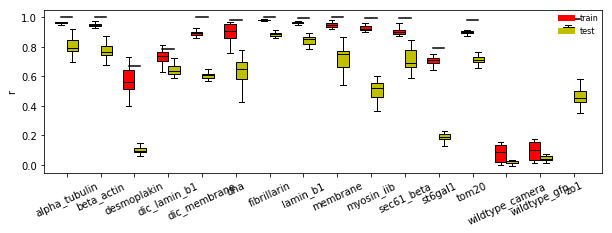

In [6]:
overwrite=False


from fnet.utils.figures import evaluate_model

figure_dir = save_dir + os.sep + 'fig_1c'
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

#get the no-normalization results first
predictions_dir = '/root/allen/aics/modeling/cheko/projects/pytorch_fnet/results/3d_no_target_norm'
eval_save_dir = '/root/projects/pytorch_fnet/results/paper/eval_no_target_norm'



figures.evaluate_model(predictions_dir = predictions_dir, \
               path_save_dir = eval_save_dir, overwrite=overwrite)

#use the results from no-normalization as reference models
predictions_dir = '/root/allen/aics/modeling/cheko/projects/pytorch_fnet/results/3d'
eval_save_dir = '/root/projects/pytorch_fnet/results/paper/eval'
reference_file = '/root/projects/pytorch_fnet/results/paper/eval_no_target_norm/stats.pkl'

_, stats_per_im_list, stats_cmax = evaluate_model(predictions_dir = predictions_dir, \
                                                           path_save_dir = eval_save_dir, \
                                                           reference_file = reference_file, overwrite=overwrite)
stats_per_im_list.to_csv(figure_dir + os.sep + 'stats_per_im.csv')
stats_cmax.to_csv(figure_dir + os.sep + 'stats_cmax.csv')

figure_save_path = figure_dir + os.sep + 'fig_1c.eps'
figures.print_stats_all_v2(stats_per_im_list, figure_save_path = figure_save_path, parameter_to_plot = 'r', cmax_stats = stats_cmax)

figure_save_path = figure_dir + os.sep + 'fig_1c.png'
figures.print_stats_all_v2(stats_per_im_list, figure_save_path = figure_save_path, parameter_to_plot = 'r', cmax_stats = stats_cmax)

im = misc.imread(figure_save_path)
display(PIL.Image.fromarray(im))

### Figure 1c v2 ###

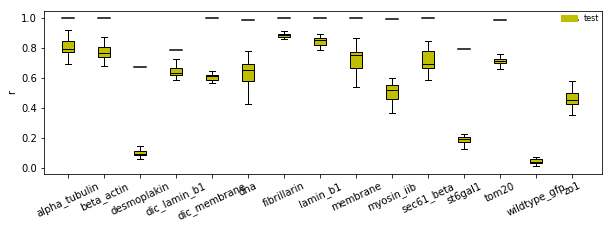

In [19]:
figure_dir = save_dir + os.sep + 'fig_1c_v2'
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

stats_per_im_list.to_csv(figure_dir + os.sep + 'stats_per_im.csv')
stats_cmax.to_csv(figure_dir + os.sep + 'stats_cmax.csv')

stats_per_im_list = stats_per_im_list[stats_per_im_list['structure'] != 'wildtype_camera']
stats_cmax = stats_cmax[stats_cmax['structure'] != 'wildtype_camera']

figure_save_path = figure_dir + os.sep + 'fig_1c.eps'
figures.print_stats_all_v2(stats_per_im_list, figure_save_path = figure_save_path, 
                           parameter_to_plot = 'r', cmax_stats = stats_cmax, show_train = False)

figure_save_path = figure_dir + os.sep + 'fig_1c.png'
figures.print_stats_all_v2(stats_per_im_list, figure_save_path = figure_save_path, 
                           parameter_to_plot = 'r', cmax_stats = stats_cmax, show_train = False)

im = misc.imread(figure_save_path)
display(PIL.Image.fromarray(im))

### Figure 1d ###

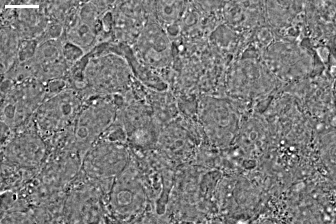

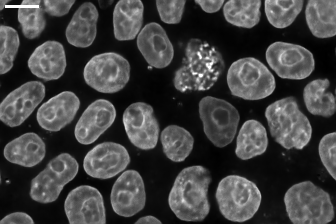

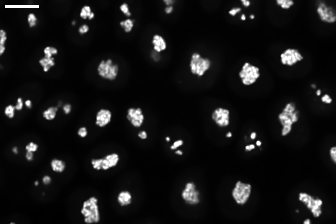

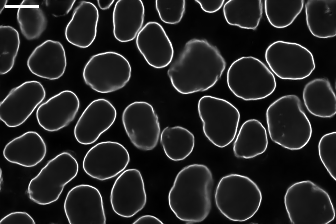

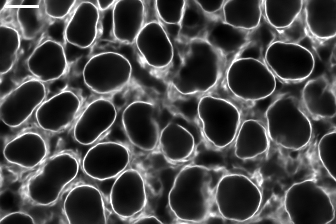

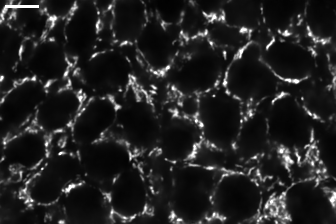

In [8]:
figure_dir = save_dir + os.sep + 'fig_1d'
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

im_dir_2d = '/root/allen/aics/modeling/cheko/projects/pytorch_fnet/animated/timelapse_wt2_s2'
im_dir_3d = '/root/allen/aics/modeling/cheko/projects/pytorch_fnet/animated/timelapse_wt2_s2_3d_tiffs'

channels = ['bf', 'dna', 'fibrillarin', 'lamin_b1', 'sec61_beta', 'tom20']

for channel in channels:
    im_paths_2d = natsorted(glob.glob(im_dir_2d + os.sep + channel + os.sep + '*.tiff'))
    im_paths_3d = natsorted(glob.glob(im_dir_3d + os.sep + channel + os.sep + '*.tiff'))
    
    im_path_2d = figure_dir + os.sep + channel + '_2d.tiff'
    im_path_2d_scale_bar = figure_dir + os.sep + channel + '_2d_scale_bar.tiff'
    im_path_3d = figure_dir + os.sep + channel + '_3d.tiff'
    
    shutil.copyfile(im_paths_2d[0], im_path_2d)
    shutil.copyfile(im_paths_3d[0], im_path_3d)
    
    img_2d = imread(im_path_2d)
    
    max_inten = np.max(img_2d)
    img_2d[:, scale_bar_pos[0]:(scale_bar_pos[0]+scale_bar_shape[0]), scale_bar_pos[1]:(scale_bar_pos[1]+scale_bar_shape[1])] = max_inten
    imsave(im_path_2d_scale_bar, img_2d)
    
    
    
    img_2d_tmp = img_2d.astype(np.float)
    img_2d_tmp = img_2d_tmp-np.min(img_2d_tmp)
    img_2d_tmp = img_2d_tmp/np.max(img_2d_tmp)
    img_2d_tmp *= 255
    
    display(PIL.Image.fromarray(np.squeeze(img_2d_tmp.astype(np.uint8))))

### Figure 1e ###

In [9]:

# window_position = [20, 140]
# window_size = [100, 100]
# border_thickness = 2

# figure_dir = save_dir + os.sep + 'fig_1e'
# if not os.path.exists(figure_dir):
#     os.makedirs(figure_dir)

# im_dir = '/root/allen/aics/modeling/cheko/projects/pytorch_fnet/animated/timelapse_wt2_s2/'


# im_bf = natsorted(glob.glob(im_dir + os.sep + 'bf/*.tiff'))
# im_dna = natsorted(glob.glob(im_dir + os.sep + 'dna/*.tiff'))

# im_fib = natsorted(glob.glob(im_dir + os.sep + 'fibrillarin/*.tiff'))
# im_lam = natsorted(glob.glob(im_dir + os.sep + 'lamin_b1/*.tiff'))
# im_sec = natsorted(glob.glob(im_dir + os.sep + 'sec61_beta/*.tiff'))
# im_tom = natsorted(glob.glob(im_dir + os.sep + 'tom20/*.tiff'))


# im_path_list = list(zip(im_bf, im_dna, im_lam, im_tom, im_sec, im_fib))

# im_path_list = list(zip(im_bf, im_dna))

# im_save_path = figure_dir + os.sep + 'fig_1e.tiff'
# im_t = figures.time_series_to_img(im_path_list, window_position, window_size, border_thickness )
# imsave(im_save_path, im_t)

# max_inten = np.max(im_t)

# im_save_path = figure_dir + os.sep + 'fig_1e_scale_bar.tiff'
# im_t[:, scale_bar_pos[0]:(scale_bar_pos[0]+scale_bar_shape[0]), scale_bar_pos[1]:(scale_bar_pos[1]+scale_bar_shape[1])] = max_inten
# imsave(im_save_path, im_t)

# print(im_t.shape)

# display(PIL.Image.fromarray(np.squeeze(im_t.astype(np.uint8))))

### Figure 1e v2 ###

(1, 102, 2040)


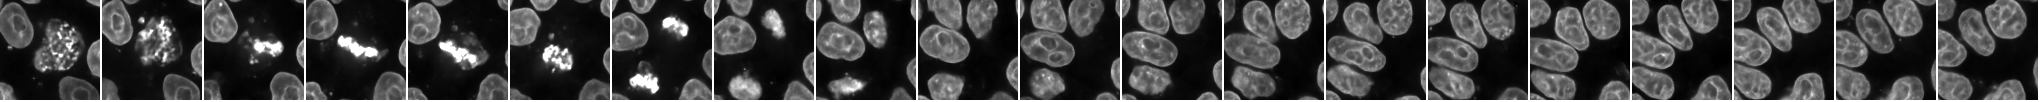

(1, 102, 2040)


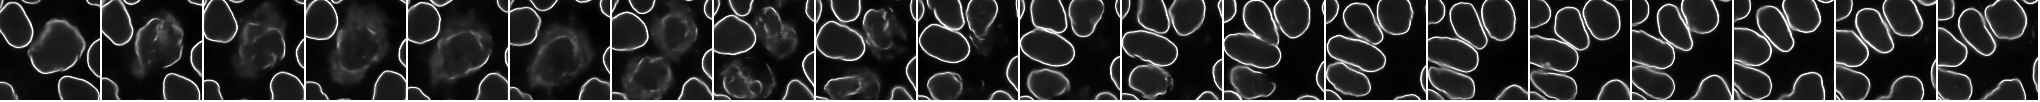

(1, 102, 2040)


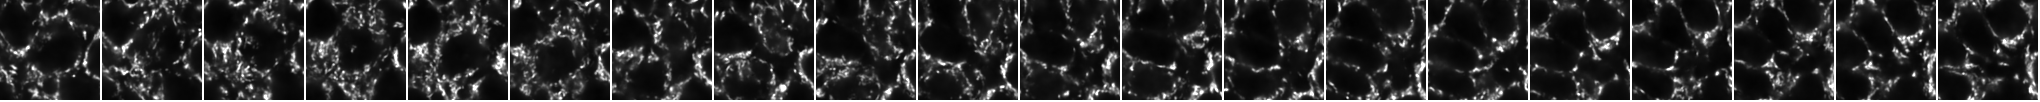

(1, 102, 2040)


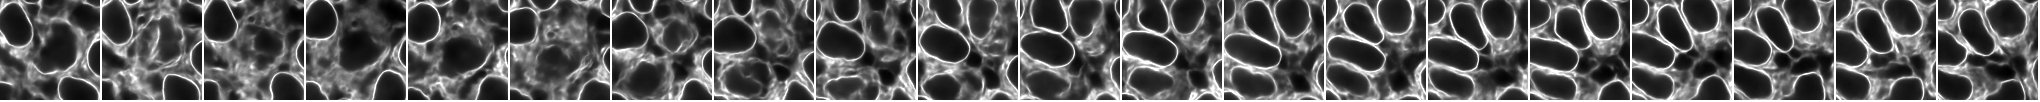

(1, 102, 2040)


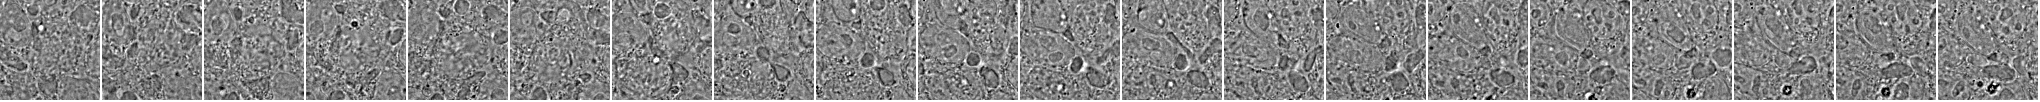

In [10]:

window_position = [20, 140]
window_size = [100, 100]
border_thickness = 2

figure_dir = save_dir + os.sep + 'fig_1e'
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

im_dir = '/root/allen/aics/modeling/cheko/projects/pytorch_fnet/animated/timelapse_wt2_s2/'


im_bf = natsorted(glob.glob(im_dir + os.sep + 'bf/*.tiff'))
im_dna = natsorted(glob.glob(im_dir + os.sep + 'dna/*.tiff'))

im_fib = natsorted(glob.glob(im_dir + os.sep + 'fibrillarin/*.tiff'))
im_lam = natsorted(glob.glob(im_dir + os.sep + 'lamin_b1/*.tiff'))
im_sec = natsorted(glob.glob(im_dir + os.sep + 'sec61_beta/*.tiff'))
im_tom = natsorted(glob.glob(im_dir + os.sep + 'tom20/*.tiff'))


channel_paths = [im_dna, im_lam, im_tom, im_sec, im_bf]
channel_names = np.array([ch[0].split('/')[-2] for ch in channel_paths])

channels_out = list()
for channel, channel_name in zip(channel_paths, channel_names):

#     im_path_list = list(zip(im_bf, channel))
    im_path_list = [[ch] for ch in channel]

# im_path_list = list(zip(im_bf, im_dna))

    im_t = figures.time_series_to_img(im_path_list, window_position, window_size, border_thickness, border_color = 255)
    max_inten = np.max(im_t)

    print(im_t.shape)

    display(PIL.Image.fromarray(np.squeeze(im_t.astype(np.uint8))))
    
    imsave(figure_dir + os.sep + channel_name + '.tiff', im_t)
    
    channels_out += [im_t]
    
    im_t = np.copy(im_t)
    im_t[:, scale_bar_pos[0]:(scale_bar_pos[0]+scale_bar_shape[0]), scale_bar_pos[1]:(scale_bar_pos[1]+scale_bar_shape[1])] = np.max(im_t)
    imsave(figure_dir + os.sep + channel_name + '_scale_bar.tiff', im_t)
    
    
channels_out = np.array(channels_out)

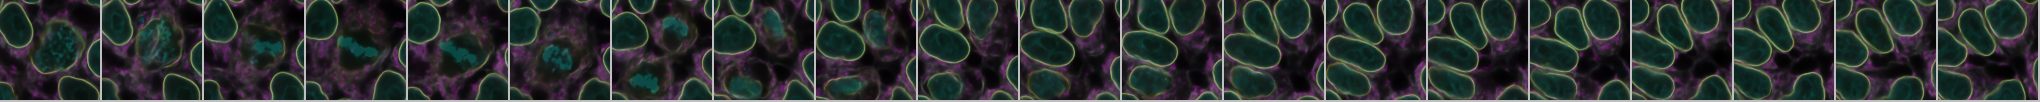

In [11]:
import aicsimage.processing as proc
import collections


n_channels = 4
ch_range = np.arange(n_channels)

colors=np.array([[0,1,1], [1,1,0], [1,0,1], [1,1,1]])

colors = colors[ch_range]
ch = channels_out[ch_range]

im_out = list()

for channel, color in zip(ch, colors):
    min_bf, max_bf = np.percentile(channel, [0.1, 99.9])
    channel = normalize_im(channel, min_bf, max_bf)
    
    channel = np.tile(channel, [3,1,1])
    
    for i, c in zip(range(3), color):
        channel[i] *= c
    
    im_out+=[channel]

im_out = np.sum(im_out,0)    
    
# im_out = proc.imgtoprojection(channels_out, )

# min_bf, max_bf = np.percentile(im_out, [0.1, 99.9])
# im_out = normalize_im(im_out, min_bf, max_bf)

im_out /= n_channels

display(PIL.Image.fromarray(np.squeeze(np.transpose(im_out, [1,2,0]).astype(np.uint8))))

imsave(figure_dir + os.sep + 'all_channel.tiff', im_out)

im_out[:, scale_bar_pos[0]:(scale_bar_pos[0]+scale_bar_shape[0]), scale_bar_pos[1]:(scale_bar_pos[1]+scale_bar_shape[1])] = np.max(im_out)
imsave(figure_dir + os.sep + 'all_channel_scale_bar.tiff', im_out)

d = [{'channels': ch, 'colors': color} for ch, color in zip(channel_names[ch_range], colors[ch_range])]

df = pd.DataFrame.from_dict(d)

df.to_csv(figure_dir + os.sep + 'all_channel_info.csv')